<img src="https://dgg-online.de/WordPress_01/wp-content/uploads/2022/10/20220928_000149_BlueSeis_Setup-scaled.jpg" align="right" alt="BlueSeis Image" width="500" height="100" />

# Analyse BlueSeis BSPF Events

Download Data of BlueSeis at Pinon Flat Observatory via IRIS. 

In [1]:
import os
import obspy as obs
import numpy as np

In [2]:
from functions.request_data import __request_data

In [3]:
# def __request_data(seed, tbeg, tend):

#     from obspy.clients.fdsn import Client

#     client = Client("IRIS")

#     net, sta, loc, cha = seed.split(".")

#     try:
#         inventory = client.get_stations( network=net,
#                                          station=sta,
#                                          starttime=tbeg-60,
#                                          endtime=tend+60,
#                                          level="response",
#                                         )
#     except:
#         print("Failed to load inventory!")


#     try:
#         waveform = client.get_waveforms( network=net,
#                                          station=sta,
#                                          location=loc,
#                                          channel=cha,
#                                          starttime=tbeg-60,
#                                          endtime=tend+60,
#                                         )

#     except:
#         print("Failed to load waveforms!")

#     finally:
#         return waveform, inventory

## Configurations

In [4]:
config = {}

## Event M62
config['tbeg'] = obs.UTCDateTime("2022-11-22 16:38:00")
config['tend'] = obs.UTCDateTime("2022-11-22 16:52:00")

## Event M42
config['tbeg'] = obs.UTCDateTime("2022-12-31 12:12:07")
config['tend'] = obs.UTCDateTime("2022-12-31 12:13:20")

config['seed_blueseis'] = "PY.BSPF.*.HJ*"

if obs.UTCDateTime("2023-04-01") < config['tbeg']:
    config['seed_seismometer'] = "PY.PFOIX.*.HH*"
else:
    # config['seed_seismometer'] = "II.PFO.10.BH*"
    config['seed_seismometer'] = "II.XPFO.30.BH*"


## Load Data

In [5]:
rot, rot_inv = __request_data(config['seed_blueseis'], config['tbeg'], config['tend'])

 -> sensitivity removed!


In [6]:
rot_inv

Inventory created at 2023-10-06T12:18:31.090800Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2022-12-31...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			PY
		Stations (1):
			PY.BSPF (iXblue Blueseis, Pinon Flat Obs., Anza, CA, USA)
		Channels (24):
			PY.BSPF..ACE, PY.BSPF..HHZ, PY.BSPF..HHN, PY.BSPF..HHE, 
			PY.BSPF..HJ1, PY.BSPF..HJ2, PY.BSPF..HJ3, PY.BSPF..LCE, 
			PY.BSPF..LCQ, PY.BSPF..LOG, PY.BSPF..OCF, PY.BSPF..VCO, 
			PY.BSPF..VEA, PY.BSPF..VEC, PY.BSPF..VEP, PY.BSPF..VKI, 
			PY.BSPF..VM0, PY.BSPF..VM1, PY.BSPF..VM2, PY.BSPF..VM3, 
			PY.BSPF..VM4, PY.BSPF..VM5, PY.BSPF..VM6, PY.BSPF..VPB

3 Trace(s) in Stream:
PY.BSPF..HJZ | 2022-12-31T12:11:07.003700Z - 2022-12-31T12:14:19.998700Z | 200.0 Hz, 38600 samples
PY.BSPF..HJN | 2022-12-31T12:11:07.003700Z - 2022-12-31T12:14:19.998700Z | 200.0 Hz, 38600 samples
PY.BSPF..HJE | 2022-12-31T12:11:07.003700Z - 2022-12-31T12:14:19.998700Z | 200.0 Hz, 38600 samples


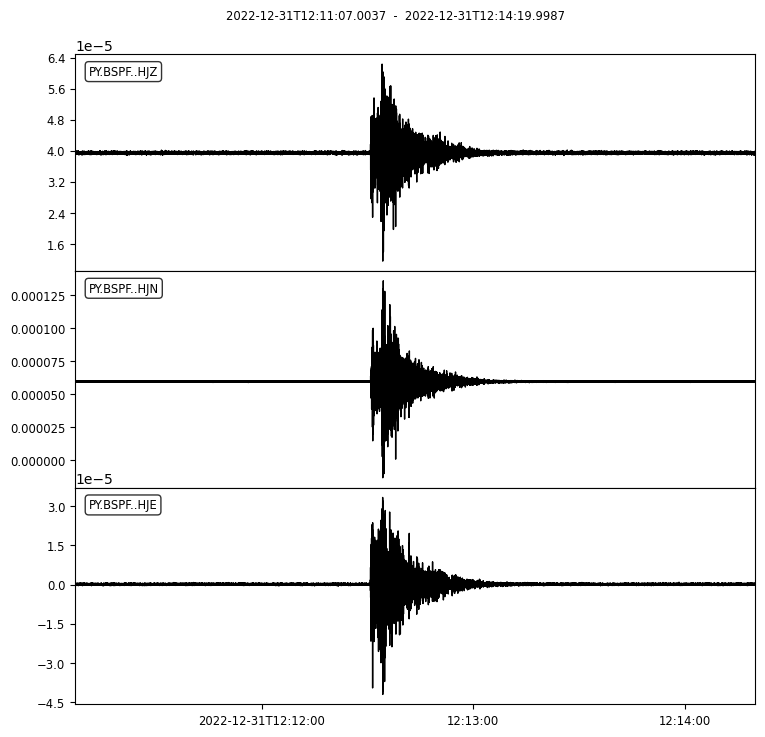

In [7]:
print(rot)
rot.plot(equal_scale=False);

In [8]:
acc, acc_inv = __request_data(config['seed_seismometer'], config['tbeg'], config['tend'])

 -> sensitivity removed!


3 Trace(s) in Stream:
II.XPFO.30.BHZ | 2022-12-31T12:11:07.019538Z - 2022-12-31T12:14:19.994538Z | 40.0 Hz, 7720 samples
II.XPFO.30.BHN | 2022-12-31T12:11:07.019538Z - 2022-12-31T12:14:19.994538Z | 40.0 Hz, 7720 samples
II.XPFO.30.BHE | 2022-12-31T12:11:07.019538Z - 2022-12-31T12:14:19.994538Z | 40.0 Hz, 7720 samples


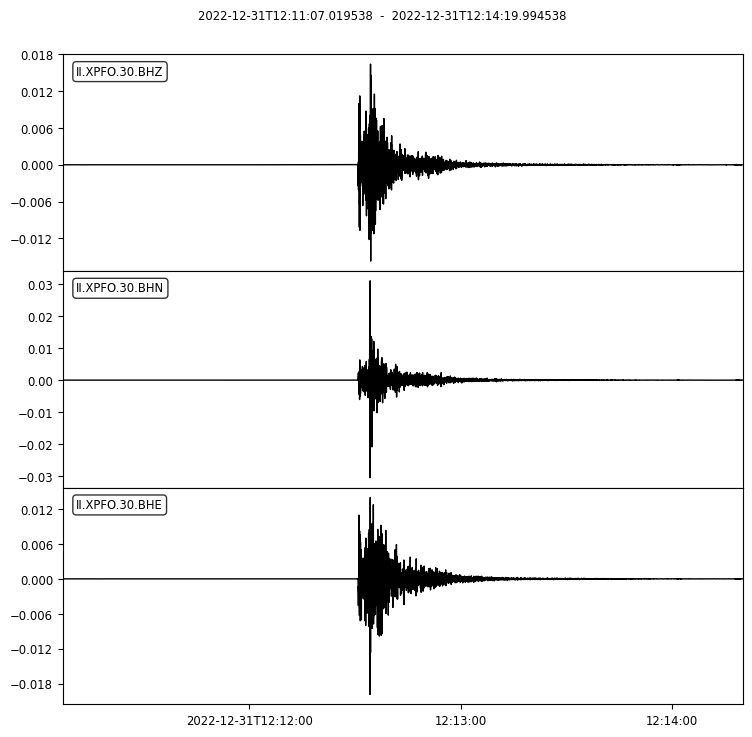

In [9]:
print(acc)
acc.plot(equal_scale=False);

In [10]:
acc_inv

Inventory created at 2023-10-06T12:18:41.485500Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2022-12-31...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			II
		Stations (1):
			II.XPFO (Pinon Flat, California, USA)
		Channels (82):
			II.XPFO.00.BHZ, II.XPFO.00.BH1, II.XPFO.00.BH2, II.XPFO.00.LCE, 
			II.XPFO.00.LCQ, II.XPFO.00.LHZ, II.XPFO.00.LH1, II.XPFO.00.LH2, 
			II.XPFO.00.VHZ, II.XPFO.00.VH1, II.XPFO.00.VH2, II.XPFO.00.VMU, 
			II.XPFO.00.VMV, II.XPFO.00.VMW, II.XPFO.20.BHZ, II.XPFO.20.BH1, 
			II.XPFO.20.BH2, II.XPFO.20.LCE, II.XPFO.20.LCQ, II.XPFO.20.LHZ, 
			II.XPFO.20.LH1, II.XPFO.20.LH2, II.XPFO.20.VHZ, II.XPFO.20.VH1, 
			II.XPFO.20.VH2, II.XPFO.20.VMU, II.XPFO.20.VMV, II.XPFO.20.VMW, 
			II.XPFO.30.BDF, II.XPFO.30.BHZ, II.XPFO.30.BH1, II.XPFO.30.BH2, 
			II.XPFO.30.LCE, II.XPFO.30.LCQ, II.XPFO.30.LDF, II.XPFO.30.LDI, 
			II.XPFO.30.LDO, II.XPFO.30.LHZ, II.XPFO.30.LH1

In [11]:
st = obs.Stream()
st+=rot
st+=acc

In [12]:
# st.write("./event62_6C.mseed", format="MSEED")

In [13]:
acc_inv.write(f"{acc[0].stats.station}.xml", format="STATIONXML")
rot_inv.write(f"{rot[0].stats.station}.xml", format="STATIONXML")